# Task 6.6
#### Step 1-3: Import Libraries, Find Data, & Create Subset (if needed)
#### Step 4: Line Chart
#### Step 5: Decomposition
#### Step 6: Dickey Fuller Test
#### Step 7-8: Differencing
#### Step 9: Autocorrelation

## Step 1-3: Import Libraries, Find Data, & Create Subset (If nedded)

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#configure API key
quandl.ApiConfig.api_key = 'B4xeYeQM7Cey_sUTz4xH'

In [3]:
#import Carbon Dioxide (CO2) Emmissions - Total Europe
data = quandl.get('BP/C02_EMMISSIONS_EUR')

In [4]:
data.head()

Value
Date                   
1965-12-31  3427.810483
1966-12-31  3474.885568
1967-12-31  3543.858134
1968-12-31  3757.726642
1969-12-31  4008.326486

## Step 4: Line Chart

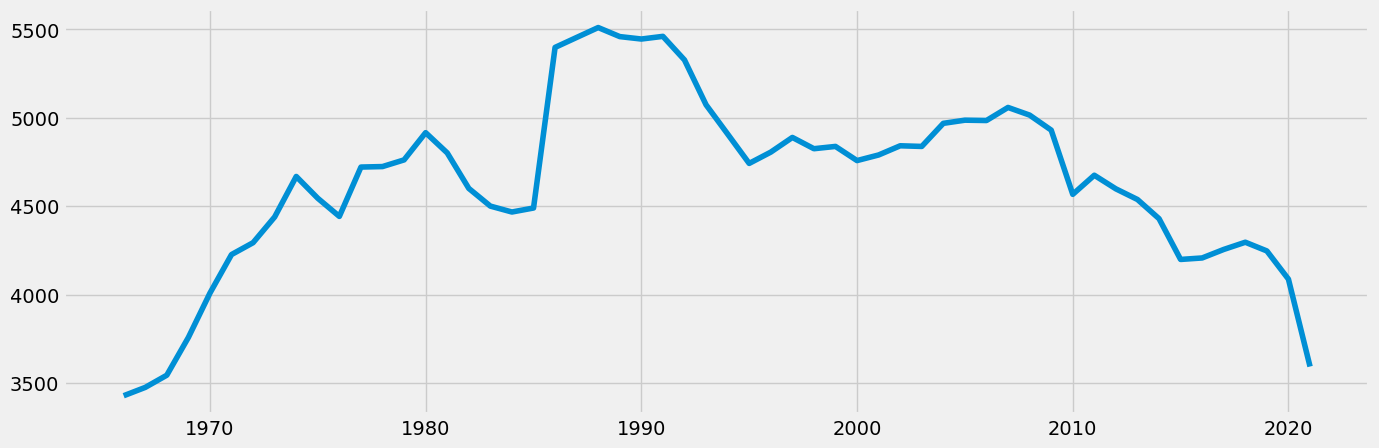

In [5]:
#plot data
plt.figure(figsize=(15,5), dpi=100)

plt.plot(data)

In [6]:
data.isnull().sum() 

Value    0
dtype: int64

In [7]:
dups = data.duplicated()
dups.sum()

0

## Step 5: Decomposition

In [8]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [9]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

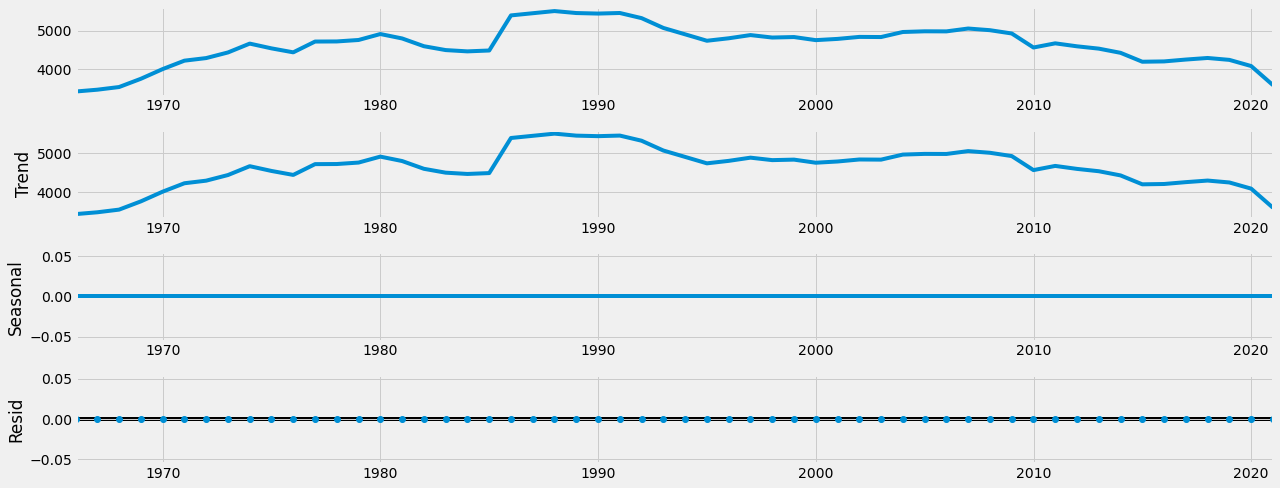

In [10]:
decomposition.plot()
plt.show()

the trend seems to rise but then starts declining towards the end - there is no seasonality - there is no noise

## Step 6: Dickey Fuller Test

In [11]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.923830
p-value                         0.320935
Number of Lags Used             1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


p-value = 0.3220935 which is not less than 0.05 so it is not significant

the test statistic of -1.928330 is greater than all of the critical values, so the null hypothesis cannot be rejected

null hypothesis: carbon dioxide emissions have increased over time

data is not stationary

## Step 7-8: Differencing

In [12]:
data_diff = data - data.shift(1)

In [13]:
data_diff.dropna(inplace = True)

In [14]:
data_diff.head()

Value
Date                  
1966-12-31   47.075085
1967-12-31   68.972566
1968-12-31  213.868508
1969-12-31  250.599843
1970-12-31  217.794394

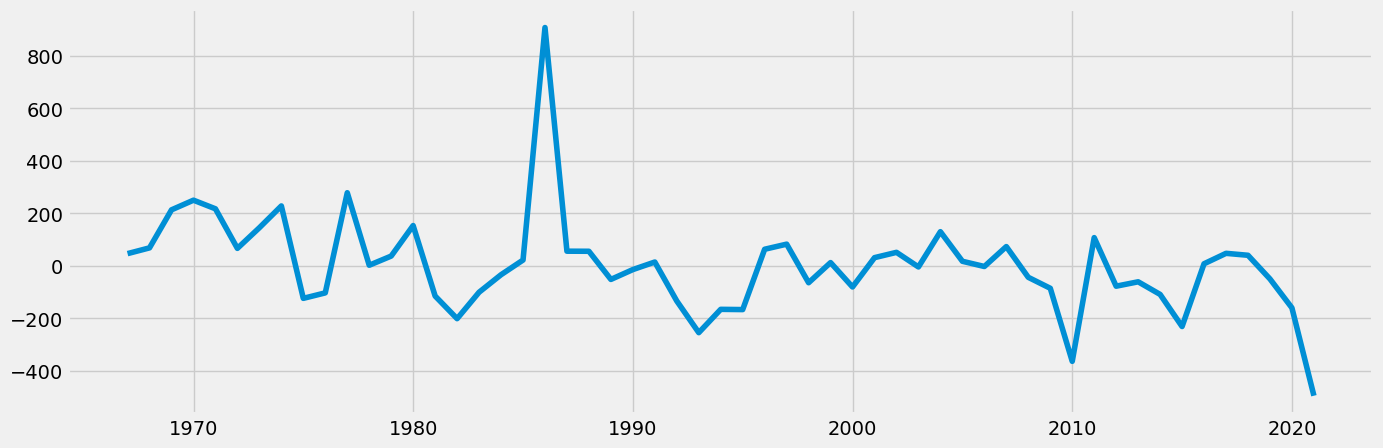

In [15]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [16]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.148787
p-value                         0.000011
Number of Lags Used             0.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


test statistic -5.148787 is now smaller than all critical values - so null hypothesis can be rejected

## Step 9: Autocorrelation

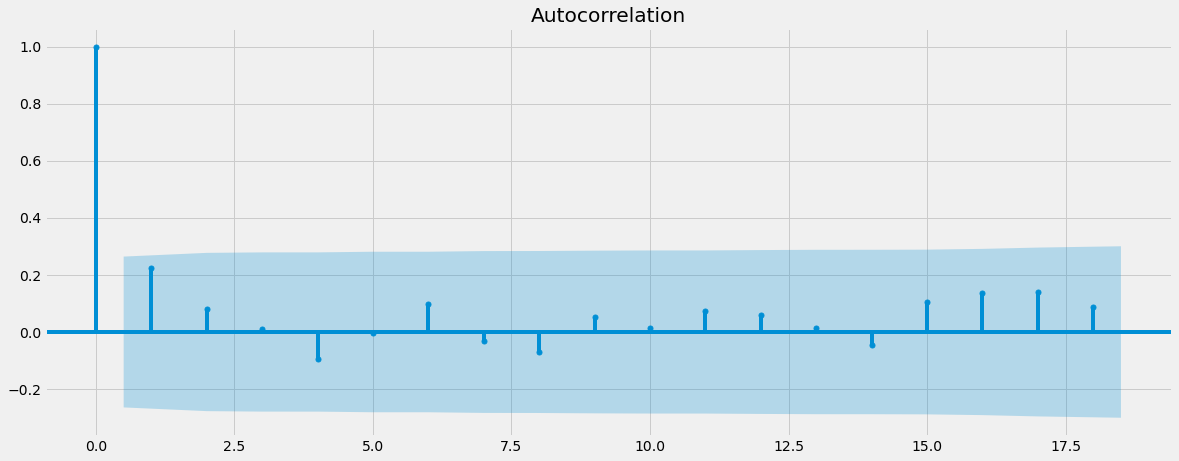

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plt.show()